<a href="https://colab.research.google.com/github/ManqiZhang0513/DLA3/blob/main/DLA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


# Load the datasets
train_df = pd.read_csv('Google_Stock_Price_Train.csv')
test_df = pd.read_csv('Google_Stock_Price_Test.csv')

# Display the first few rows of each dataset to understand the structure
train_df.info(), test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


(None, None)

In [2]:
train_df.describe(), test_df.describe()

(              Open         High          Low
 count  1258.000000  1258.000000  1258.000000
 mean    533.709833   537.880223   529.007409
 std     151.904442   153.008811   150.552807
 min     279.120000   281.210000   277.220000
 25%     404.115000   406.765000   401.765000
 50%     537.470000   540.750000   532.990000
 75%     654.922500   662.587500   644.800000
 max     816.680000   816.680000   805.140000,
              Open        High         Low       Close
 count   20.000000   20.000000   20.000000   20.000000
 mean   807.526000  811.926500  801.949500  807.904500
 std     15.125428   14.381198   13.278607   13.210088
 min    778.810000  789.630000  775.800000  786.140000
 25%    802.965000  806.735000  797.427500  802.282500
 50%    806.995000  808.640000  801.530000  806.110000
 75%    809.560000  817.097500  804.477500  810.760000
 max    837.810000  841.950000  827.010000  835.670000)

In [3]:
# Preprocessing the dataset

# Convert the 'Date' column to datetime
train_df['Date'] = pd.to_datetime(train_df['Date'], format='%m/%d/%Y')
test_df['Date'] = pd.to_datetime(test_df['Date'], format='%m/%d/%Y')

# Remove commas and convert relevant columns to numeric
for feature in ['Open', 'High', 'Low', 'Close', 'Volume']:
    if train_df[feature].dtype == 'object':
        train_df[feature] = train_df[feature].str.replace(',', '').astype(float)
    if test_df[feature].dtype == 'object':
        test_df[feature] = test_df[feature].str.replace(',', '').astype(float)

# Extract the relevant columns for modeling (Open, High, Low, Close, Volume)
features = ['Open', 'High', 'Low', 'Close', 'Volume']



In [4]:
train_df.info(), test_df.info()
train_df.describe(), test_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1258 non-null   datetime64[ns]
 1   Open    1258 non-null   float64       
 2   High    1258 non-null   float64       
 3   Low     1258 non-null   float64       
 4   Close   1258 non-null   float64       
 5   Volume  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 59.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    20 non-null     datetime64[ns]
 1   Open    20 non-null     float64       
 2   High    20 non-null     float64       
 3   Low     20 non-null     float64       
 4   Close   20 non-null     float64       
 5   Volume  20 non-null     float64       
dtypes: datetime64[ns](1), f

(                                Date         Open         High          Low  \
 count                           1258  1258.000000  1258.000000  1258.000000   
 mean   2014-07-03 20:00:45.786963456   533.709833   537.880223   529.007409   
 min              2012-01-03 00:00:00   279.120000   281.210000   277.220000   
 25%              2013-04-05 18:00:00   404.115000   406.765000   401.765000   
 50%              2014-07-05 00:00:00   537.470000   540.750000   532.990000   
 75%              2015-10-01 18:00:00   654.922500   662.587500   644.800000   
 max              2016-12-30 00:00:00   816.680000   816.680000   805.140000   
 std                              NaN   151.904442   153.008811   150.552807   
 
              Close        Volume  
 count  1258.000000  1.258000e+03  
 mean    712.669666  3.158107e+06  
 min     491.200000  7.900000e+03  
 25%     576.740000  1.621700e+06  
 50%     695.675000  2.566150e+06  
 75%     782.105000  4.122500e+06  
 max    1216.830000  2.497

In [5]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Split the training data into train and validation sets (70% train, 15% validation)
train_data, val_data = train_test_split(train_df[features].values, test_size=0.15, random_state=42, shuffle=False)

# Normalize the features using Min-Max Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data)
val_data_scaled = scaler.transform(val_data)




In [6]:

# Define a function to create sliding windows for time series data
def create_dataset(data, look_back=5):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        y.append(data[i + look_back])  # Predicting the next day's data (Open, High, Low, Close, Volume)
    return np.array(X), np.array(y)

# Create sliding windows for train and validation sets
look_back = 5
X_train, y_train = create_dataset(train_data_scaled, look_back)
X_val, y_val = create_dataset(val_data_scaled, look_back)

# Define the Vanilla RNN model as baseline
vanilla_rnn_model = Sequential([
    SimpleRNN(50, input_shape=(look_back, 5)),
    Dense(5)  # Output layer to predict 'Open', 'High', 'Low', 'Close', 'Volume'
])

# Compile the Vanilla RNN model
vanilla_rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Vanilla RNN model
vanilla_rnn_history = vanilla_rnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.1153 - val_loss: 0.0289
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0063 - val_loss: 0.0065
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0034 - val_loss: 0.0045
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - val_loss: 0.0017
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022 - val_loss: 8.0697e-04
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 - val_loss: 9.5791e-04
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - val_loss: 7.6105e-04
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


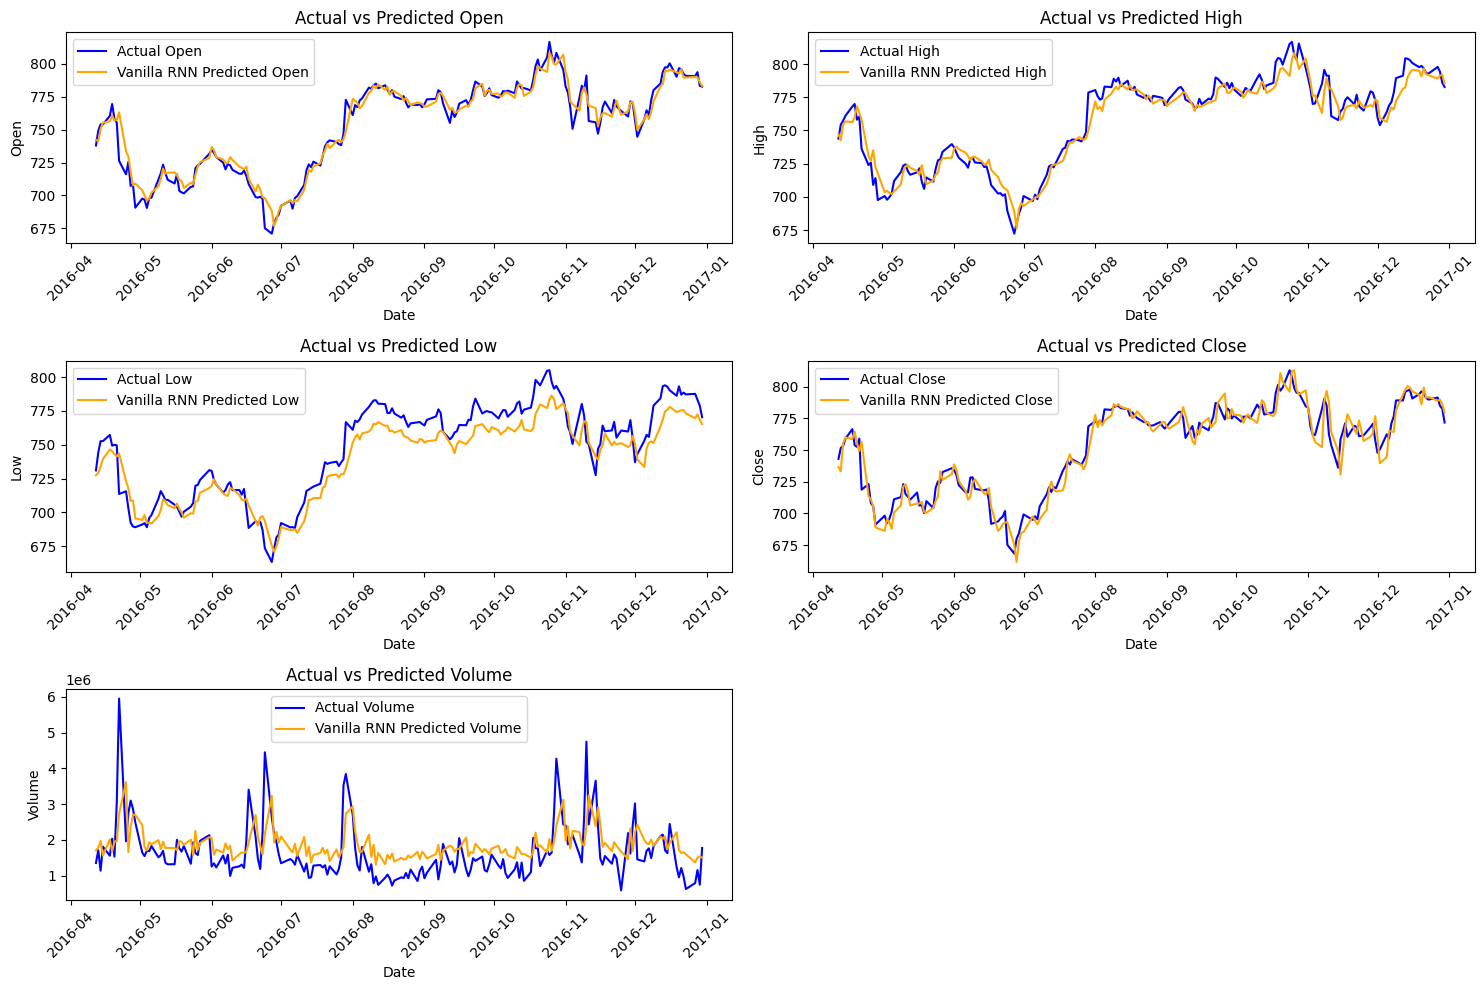

In [7]:
vanilla_rnn_val_predictions = vanilla_rnn_model.predict(X_val)

# Inverse transform the predictions and actual values
val_data_inverse = scaler.inverse_transform(y_val)
vanilla_rnn_val_predictions_inverse = scaler.inverse_transform(vanilla_rnn_val_predictions)

# Prepare date labels for the validation set
val_dates = train_df['Date'].iloc[-len(val_data_inverse):].values

# Plot the predicted vs actual values for all features
plt.figure(figsize=(15, 10))

feature_names = ['Open', 'High', 'Low', 'Close', 'Volume']
for i in range(5):  # Loop through all 5 features
    plt.subplot(3, 2, i + 1)  # Create a subplot for each feature
    plt.plot(val_dates, val_data_inverse[:, i], label=f'Actual {feature_names[i]}', color='blue')
    plt.plot(val_dates, vanilla_rnn_val_predictions_inverse[:, i], label=f'Vanilla RNN Predicted {feature_names[i]}', color='orange')
    plt.xlabel('Date')
    plt.ylabel(feature_names[i])
    plt.legend()
    plt.title(f'Actual vs Predicted {feature_names[i]}')
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust subplot spacing
plt.show()


In [8]:
from sklearn.metrics import mean_squared_error, r2_score

feature_names = ['Open', 'High', 'Low', 'Close', 'Volume']
for i, feature in enumerate(feature_names):
    mse = mean_squared_error(y_val[:, i], vanilla_rnn_val_predictions[:, i])
    r2 = r2_score(y_val[:, i], vanilla_rnn_val_predictions[:, i])
    print(f'{feature} - MSE: {mse:.4f}, R^2: {r2:.4f}')

vanilla_rnn_mse = mean_squared_error(y_val, vanilla_rnn_val_predictions)
vanilla_rnn_r2 = r2_score(y_val, vanilla_rnn_val_predictions)
print(f'Vanilla RNN Validation Overall MSE: {vanilla_rnn_mse}')
print(f'Vanilla RNN Validation Overall R^2: {vanilla_rnn_r2}')

Open - MSE: 0.0002, R^2: 0.9630
High - MSE: 0.0003, R^2: 0.9391
Low - MSE: 0.0007, R^2: 0.8587
Close - MSE: 0.0002, R^2: 0.9270
Volume - MSE: 0.0007, R^2: 0.2083
Vanilla RNN Validation Overall MSE: 0.000405728155649528
Vanilla RNN Validation Overall R^2: 0.7792071204695475


In [9]:
# Define the GRU model
gru_model = Sequential([
    GRU(50, input_shape=(look_back, 5)),
    Dense(5)  # Output layer to predict 'Open', 'High', 'Low', 'Close', 'Volume'
])

# Compile the GRU model
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the GRU model
gru_history = gru_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0954 - val_loss: 0.0073
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - val_loss: 0.0019
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - val_loss: 0.0013
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020 - val_loss: 6.5100e-04
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020 - val_loss: 5.8631e-04
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - val_loss: 5.5854e-04
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 - val_loss: 5.6753e-04
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016 - val_loss: 5.6098e-04
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 - val_loss: 6.0505e-04
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - val_loss: 8.3725e-04
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0013 - val_loss: 5.5210e-04
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 230ms/step


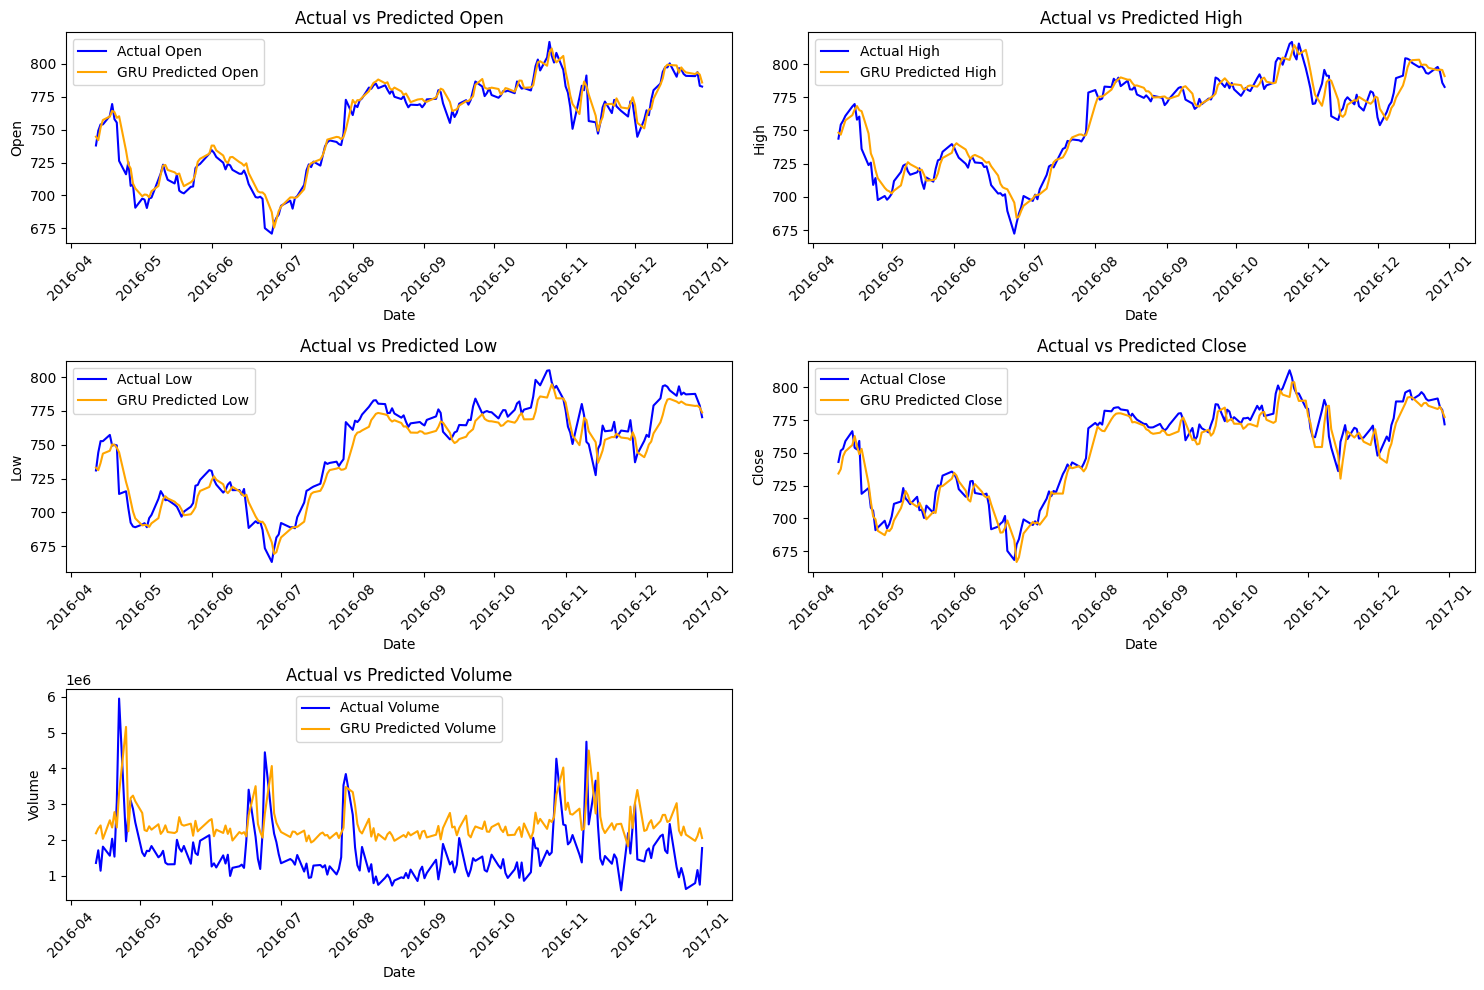

In [10]:
# Inverse transform the predictions and actual values
gru_val_predictions = gru_model.predict(X_val)
gru_val_predictions_inverse = scaler.inverse_transform(gru_val_predictions)

# Plot the predicted vs actual values for all features
plt.figure(figsize=(15, 10))

feature_names = ['Open', 'High', 'Low', 'Close', 'Volume']
for i in range(5):  # Loop through all 5 features
    plt.subplot(3, 2, i + 1)  # Create a subplot for each feature
    plt.plot(val_dates, val_data_inverse[:, i], label=f'Actual {feature_names[i]}', color='blue')
    plt.plot(val_dates, gru_val_predictions_inverse[:, i], label=f'GRU Predicted {feature_names[i]}', color='orange')
    plt.xlabel('Date')
    plt.ylabel(feature_names[i])
    plt.legend()
    plt.title(f'Actual vs Predicted {feature_names[i]}')
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust subplot spacing
plt.show()

In [11]:
# Evaluate the GRU model
feature_names = ['Open', 'High', 'Low', 'Close', 'Volume']
for i, feature in enumerate(feature_names):
    mse = mean_squared_error(y_val[:, i], gru_val_predictions[:, i])
    r2 = r2_score(y_val[:, i], gru_val_predictions[:, i])
    print(f'{feature} - MSE: {mse:.4f}, R^2: {r2:.4f}')

gru_val_mse = mean_squared_error(y_val, gru_val_predictions)
gru_val_r2 = r2_score(y_val, gru_val_predictions)
print(f'GRU Best Model Validation Overall MSE: {gru_val_mse}')
print(f'GRU Best Model Validation Overall R^2: {gru_val_r2}')

Open - MSE: 0.0002, R^2: 0.9583
High - MSE: 0.0003, R^2: 0.9398
Low - MSE: 0.0004, R^2: 0.9114
Close - MSE: 0.0002, R^2: 0.9211
Volume - MSE: 0.0017, R^2: -0.8521
GRU Best Model Validation Overall MSE: 0.0005572776649122586
GRU Best Model Validation Overall R^2: 0.5757248572791994


In [12]:
# Define the LSTM model
lstm_model = Sequential([
    LSTM(50, input_shape=(look_back, 5)),
    Dense(5)  # Output layer to predict 'Open', 'High', 'Low', 'Close', 'Volume'
])

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
lstm_history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0948 - val_loss: 0.0035
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0091 - val_loss: 0.0052
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020 - val_loss: 8.5422e-04
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - val_loss: 9.1609e-04
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - val_loss: 6.0299e-04
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020 - val_loss: 6.7986e-04
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0019 - val_loss: 7.8517e-04
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0019 - val_loss: 6.6534e-04
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - val_loss: 8.3700e-04
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


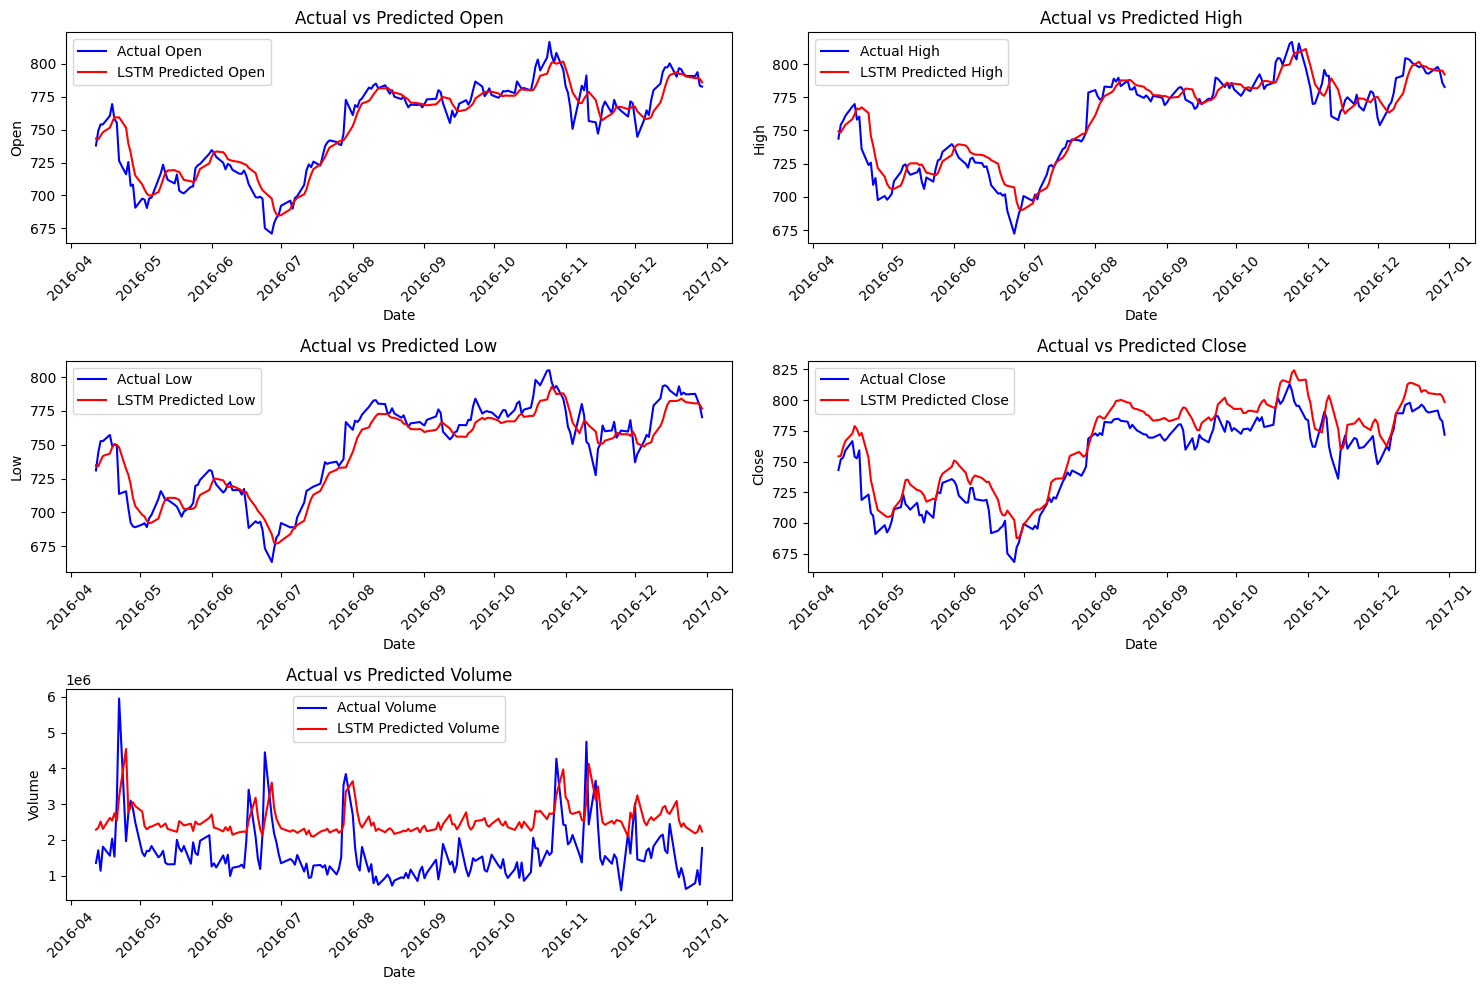

In [13]:
# Inverse transform the predictions and actual values
lstm_val_predictions = lstm_model.predict(X_val)

lstm_val_predictions_inverse = scaler.inverse_transform(lstm_val_predictions)
y_val_inverse = scaler.inverse_transform(y_val)

# Plot the predicted vs actual values for all features
plt.figure(figsize=(15, 10))

feature_names = ['Open', 'High', 'Low', 'Close', 'Volume']
for i in range(5):  # Loop through all 5 features
    plt.subplot(3, 2, i + 1)  # Create a subplot for each feature
    plt.plot(val_dates, y_val_inverse[:, i], label=f'Actual {feature_names[i]}', color='blue')
    plt.plot(val_dates, lstm_val_predictions_inverse[:, i], label=f'LSTM Predicted {feature_names[i]}', color='red')
    plt.xlabel('Date')
    plt.ylabel(feature_names[i])
    plt.legend()
    plt.title(f'Actual vs Predicted {feature_names[i]}')
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust subplot spacing
plt.show()


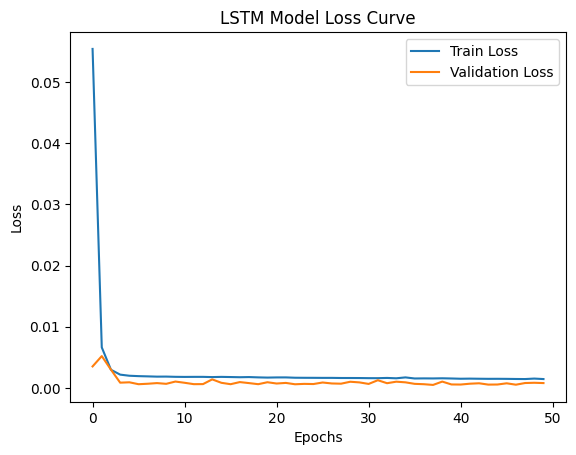

In [14]:
import matplotlib.pyplot as plt

# Create a plot for the loss curves
plt.plot(lstm_history.history['loss'], label='Train Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')

# Adding labels and title
plt.title('LSTM Model Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()


In [15]:
# Evaluate the LSTM model
feature_names = ['Open', 'High', 'Low', 'Close', 'Volume']
for i, feature in enumerate(feature_names):
    mse = mean_squared_error(y_val[:, i], lstm_val_predictions[:, i])
    r2 = r2_score(y_val[:, i], lstm_val_predictions[:, i])
    print(f'{feature} - MSE: {mse:.4f}, R^2: {r2:.4f}')
lstm_val_predictions = lstm_model.predict(X_val)
lstm_val_mse = mean_squared_error(y_val, lstm_val_predictions)
lstm_val_r2 = r2_score(y_val, lstm_val_predictions)
print(f'LSTM Best Model Validation Overall MSE: {lstm_val_mse}')
print(f'LSTM Best Model Validation Overall R^2: {lstm_val_r2}')

Open - MSE: 0.0004, R^2: 0.9124
High - MSE: 0.0004, R^2: 0.9007
Low - MSE: 0.0005, R^2: 0.8921
Close - MSE: 0.0006, R^2: 0.7384
Volume - MSE: 0.0020, R^2: -1.1498
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
LSTM Best Model Validation Overall MSE: 0.000788456846328282
LSTM Best Model Validation Overall R^2: 0.4587591078920136


In [101]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

# Extract open, high, low, close features data and volume data seperately
train_ohlc_features = train_data[:, :4]  # open, high, low, close
train_volume_feature = train_data[:, 4:]  # volume
val_ohlc_features = val_data[:, :4]  # open, high, low, close
val_volume_feature = val_data[:, 4:]  # volume
test_ohlc_features = test_df[['Open', 'High', 'Low', 'Close']].values  # open, high, low, close
test_volume_feature = test_df[['Volume']].values  # volume

# Creat Scaler
scaler_ohlc = MinMaxScaler()  # Normalize open, high, low, close using Min-Max scaling
scaler_volume = RobustScaler()  # Normalize volume using Robust scaling

train_scaled_ohlc = scaler_ohlc.fit_transform(train_ohlc_features)
train_scaled_volume = scaler_volume.fit_transform(train_volume_feature)
val_scaled_ohlc = scaler_ohlc.transform(val_ohlc_features)
val_scaled_volume = scaler_volume.transform(val_volume_feature)
test_scaled_ohlc = scaler_ohlc.transform(test_ohlc_features)
test_scaled_volume = scaler_volume.transform(test_volume_feature)

# Merge scaled data
scaled_train_data = np.hstack((train_scaled_ohlc, train_scaled_volume))
scaled_val_data = np.hstack((val_scaled_ohlc, val_scaled_volume))
scaled_test_data = np.hstack((test_scaled_ohlc, test_scaled_volume))

# Check the shape
print(scaled_train_data.shape)  # the shape should be same with train_data
print(train_data.shape)

print(scaled_val_data.shape) # the shape should be same with val_data
print(val_data.shape)

print(scaled_test_data.shape) # the shape should be same with val_data
print(test_df[['Open', 'High', 'Low', 'Close','Volume']].values.shape)

(1069, 5)
(1069, 5)
(189, 5)
(189, 5)
(20, 5)
(20, 5)


In [17]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
look_back = 5

X_train_opt, y_train_opt = create_dataset(scaled_train_data, look_back)
X_val_opt, y_val_opt = create_dataset(scaled_val_data, look_back)

# Define a function to create an LSTM model for hyperparameter tuning (only for Open, High, Low, Close)
def build_lstm_model_for_ohlc(units=50, activation='tanh', learning_rate=0.001, optimizer='adam'):
    model = Sequential([
        LSTM(units, activation=activation, input_shape=(look_back, 5)),
        Dense(4)  # Output layer to predict 'Open', 'High', 'Low', 'Close' (4 values)
    ])
    if optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == 'nadam':
        optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Wrap the Keras model for use in scikit-learn (for predicting 'Open', 'High', 'Low', 'Close')
lstm_model_for_ohlc = KerasRegressor(build_fn=build_lstm_model_for_ohlc,
    units=50,  # default value, will be overridden during GridSearch
    activation='tanh',  # default value, will be overridden during GridSearch
    learning_rate=0.001,  # default value, will be overridden during GridSearch
    optimizer='adam',  # default value, will be overridden during GridSearch
    epochs=50,
    batch_size=32,
    verbose=0
)

# Define the grid of hyperparameters to search for LSTM model (for Open, High, Low, Close)
lstm_param_grid_for_ohlc = {
    'activation': ['relu', 'tanh'],
    'learning_rate': [0.005, 0.001, 0.0005],
    'optimizer': ['adam', 'sgd', 'nadam']
}

# Perform Grid Search for LSTM model to predict 'Open', 'High', 'Low', 'Close'
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)
scoring = {'mse': mse_scorer, 'r2': r2_scorer}

# Since y_train for Open, High, Low, Close is the first 4 columns, we select the appropriate values from y_train
lstm_grid_search_for_ohlc = GridSearchCV(estimator=lstm_model_for_ohlc, param_grid=lstm_param_grid_for_ohlc, cv=3, n_jobs=-1, return_train_score=False, scoring=scoring, refit='mse')
lstm_grid_result_for_ohlc = lstm_grid_search_for_ohlc.fit(X_train_opt, y_train_opt[:, :4])  # y_train[:, :4] selects 'Open', 'High', 'Low', 'Close'



/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
# Print all hyperparameter combinations and their corresponding MSE, R^2 scores for Open, High, Low, Close
lstm_cv_results_for_ohlc = lstm_grid_result_for_ohlc.cv_results_
for index in range(len(lstm_cv_results_for_ohlc['params'])):
    params = lstm_cv_results_for_ohlc['params'][index]
    mse = -lstm_cv_results_for_ohlc['mean_test_mse'][index]  # mean_test_score is negative MSE in GridSearchCV
    r2 = lstm_cv_results_for_ohlc['mean_test_r2'][index]
    print(f"Parameters: {params}, Mean Test MSE: {mse}, Mean Test R^2: {r2}")

# Print the best hyperparameters for LSTM model for Open, High, Low, Close
print("Best Hyperparameters for LSTM Model (Open, High, Low, Close): {}".format(lstm_grid_result_for_ohlc.best_params_))



Parameters: {'activation': 'relu', 'learning_rate': 0.005, 'optimizer': 'adam'}, Mean Test MSE: 0.001543391786885501, Mean Test R^2: 0.9127409967229428
Parameters: {'activation': 'relu', 'learning_rate': 0.005, 'optimizer': 'sgd'}, Mean Test MSE: 0.0015912064994441585, Mean Test R^2: 0.9138312699469502
Parameters: {'activation': 'relu', 'learning_rate': 0.005, 'optimizer': 'nadam'}, Mean Test MSE: 0.0018325582931900894, Mean Test R^2: 0.8783793222285164
Parameters: {'activation': 'relu', 'learning_rate': 0.001, 'optimizer': 'adam'}, Mean Test MSE: 0.004264488718656294, Mean Test R^2: 0.7285013231105495
Parameters: {'activation': 'relu', 'learning_rate': 0.001, 'optimizer': 'sgd'}, Mean Test MSE: 0.003004971661141345, Mean Test R^2: 0.8230538429823343
Parameters: {'activation': 'relu', 'learning_rate': 0.001, 'optimizer': 'nadam'}, Mean Test MSE: 0.003336535050087548, Mean Test R^2: 0.8028177585811429
Parameters: {'activation': 'relu', 'learning_rate': 0.0005, 'optimizer': 'adam'}, Mean

In [124]:
# Define a function to create an LSTM model for hyperparameter tuning
def build_lstm_model_for_volume(units=150, activation='tanh', learning_rate=0.001, optimizer='adam'):
    model = Sequential([
        LSTM(units, activation=activation, return_sequences=True, input_shape=(look_back, 5)),
        LSTM(50, activation=activation),
        Dense(1)  # Output layer to predict 'Volume' only
    ])
    if optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == 'nadam':
        optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Wrap the Keras model for use in scikit-learn (for predicting 'Volume')
lstm_model_for_volume = KerasRegressor(build_fn=build_lstm_model_for_volume,
    units=150,  # default value, will be overridden during GridSearch
    activation='tanh',  # default value, will be overridden during GridSearch
    learning_rate=0.001,  # default value, will be overridden during GridSearch
    optimizer='adam',  # default value, will be overridden during GridSearch
    epochs=50,
    batch_size=32,
    verbose=0
)

# Define the grid of hyperparameters to search for LSTM model (for Volume)
lstm_param_grid_for_volume = {
    'activation': ['relu', 'tanh'],
    'learning_rate': [0.005, 0.001, 0.0005],
    'optimizer': ['adam', 'sgd', 'Nadam']
}

# Perform Grid Search for LSTM model to predict 'Volume'
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

lstm_grid_search_for_volume = GridSearchCV(estimator=lstm_model_for_volume, param_grid=lstm_param_grid_for_volume, cv=3, n_jobs=-1, return_train_score=False, scoring=scoring, refit='mse')
lstm_grid_result_for_volume = lstm_grid_search_for_volume.fit(X_train_opt, y_train_opt[:, 4])  # y_train[:, 4] selects 'Volume' from the 5 columns

# Print all hyperparameter combinations and their corresponding MSE, R^2 scores for 'Volume'
lstm_cv_results_for_volume = lstm_grid_result_for_volume.cv_results_
for index in range(len(lstm_cv_results_for_volume['params'])):
    params = lstm_cv_results_for_volume['params'][index]
    mse = -lstm_cv_results_for_volume['mean_test_mse'][index]  # mean_test_score is negative MSE in GridSearchCV
    r2 = lstm_cv_results_for_volume['mean_test_r2'][index]
    print(f"Parameters: {params}, Mean Test MSE: {mse}, Mean Test R^2: {r2}")

# Print the best hyperparameters for LSTM model for 'Volume'
print("Best Hyperparameters for LSTM Model (Volume): {}".format(lstm_grid_result_for_volume.best_params_))


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Parameters: {'activation': 'relu', 'learning_rate': 0.005, 'optimizer': 'adam'}, Mean Test MSE: 0.46279955788986427, Mean Test R^2: 0.23185484843053428
Parameters: {'activation': 'relu', 'learning_rate': 0.005, 'optimizer': 'sgd'}, Mean Test MSE: 0.6070114895362501, Mean Test R^2: 0.022566269699265857
Parameters: {'activation': 'relu', 'learning_rate': 0.005, 'optimizer': 'Nadam'}, Mean Test MSE: 0.4398069886152352, Mean Test R^2: 0.28021912544238065
Parameters: {'activation': 'relu', 'learning_rate': 0.001, 'optimizer': 'adam'}, Mean Test MSE: 0.47121608859523434, Mean Test R^2: 0.2659660450782922
Parameters: {'activation': 'relu', 'learning_rate': 0.001, 'optimizer': 'sgd'}, Mean Test MSE: 0.5172382588754244, Mean Test R^2: 0.22095510577927824
Parameters: {'activation': 'relu', 'learning_rate': 0.001, 'optimizer': 'Nadam'}, Mean Test MSE: 0.47307012434745715, Mean Test R^2: 0.23452429105426967
Parameters: {'activation': 'relu', 'learning_rate': 0.0005, 'optimizer': 'adam'}, Mean Test

In [26]:

# Define a function to create an GRU model for hyperparameter tuning (only for Open, High, Low, Close)
def build_gru_model_for_ohlc(units=50, activation='tanh', learning_rate=0.001, optimizer='adam'):
    model = Sequential([
        GRU(units, activation=activation, input_shape=(look_back, 5)),
        Dense(4)  # Output layer to predict 'Open', 'High', 'Low', 'Close' (4 values)
    ])
    if optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == 'nadam':
        optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Wrap the Keras model for use in scikit-learn (for predicting 'Open', 'High', 'Low', 'Close')
gru_model_for_ohlc = KerasRegressor(build_fn=build_gru_model_for_ohlc,
    units=50,  # default value, will be overridden during GridSearch
    activation='tanh',  # default value, will be overridden during GridSearch
    learning_rate=0.001,  # default value, will be overridden during GridSearch
    optimizer='adam',  # default value, will be overridden during GridSearch
    epochs=50,
    batch_size=32,
    verbose=0
)

# Define the grid of hyperparameters to search for GRU model (for Open, High, Low, Close)
gru_param_grid_for_ohlc = {
    'activation': ['relu', 'tanh'],
    'learning_rate': [0.005, 0.001, 0.0005],
    'optimizer': ['adam', 'sgd', 'nadam']
}

# Perform Grid Search for GRU model to predict 'Open', 'High', 'Low', 'Close'
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)
scoring = {'mse': mse_scorer, 'r2': r2_scorer}

# Since y_train for Open, High, Low, Close is the first 4 columns, we select the appropriate values from y_train_opt
gru_grid_search_for_ohlc = GridSearchCV(estimator=gru_model_for_ohlc, param_grid=gru_param_grid_for_ohlc, cv=3, n_jobs=-1, return_train_score=False, scoring=scoring, refit='mse')
gru_grid_result_for_ohlc = gru_grid_search_for_ohlc.fit(X_train_opt, y_train_opt[:, :4])  # y_train[:, :4] selects 'Open', 'High', 'Low', 'Close'

# Print all hyperparameter combinations and their corresponding MSE, R^2 scores for Open, High, Low, Close
gru_cv_results_for_ohlc = gru_grid_result_for_ohlc.cv_results_
for index in range(len(gru_cv_results_for_ohlc['params'])):
    params = gru_cv_results_for_ohlc['params'][index]
    mse = -gru_cv_results_for_ohlc['mean_test_mse'][index]  # mean_test_score is negative MSE in GridSearchCV
    r2 = gru_cv_results_for_ohlc['mean_test_r2'][index]
    print(f"Parameters: {params}, Mean Test MSE: {mse}, Mean Test R^2: {r2}")

# Print the best hyperparameters for GRU model for Open, High, Low, Close
print("Best Hyperparameters for GRU Model (Open, High, Low, Close): {}".format(gru_grid_result_for_ohlc.best_params_))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Parameters: {'activation': 'relu', 'learning_rate': 0.005, 'optimizer': 'adam'}, Mean Test MSE: 0.0011786711330073027, Mean Test R^2: 0.9111949067585665
Parameters: {'activation': 'relu', 'learning_rate': 0.005, 'optimizer': 'sgd'}, Mean Test MSE: 0.0009404444961273297, Mean Test R^2: 0.9374614619350261
Parameters: {'activation': 'relu', 'learning_rate': 0.005, 'optimizer': 'nadam'}, Mean Test MSE: 0.0010263828862518388, Mean Test R^2: 0.928367981567587
Parameters: {'activation': 'relu', 'learning_rate': 0.001, 'optimizer': 'adam'}, Mean Test MSE: 0.0021800978271503363, Mean Test R^2: 0.8661743718723655
Parameters: {'activation': 'relu', 'learning_rate': 0.001, 'optimizer': 'sgd'}, Mean Test MSE: 0.001352735311520465, Mean Test R^2: 0.9261486242345708
Parameters: {'activation': 'relu', 'learning_rate': 0.001, 'optimizer': 'nadam'}, Mean Test MSE: 0.001937986310855912, Mean Test R^2: 0.8825032619599699
Parameters: {'activation': 'relu', 'learning_rate': 0.0005, 'optimizer': 'adam'}, Mea

In [ ]:
# Define a function to create a GRU model for hyperparameter tuning
def build_gru_model_for_volume(units=150, activation='tanh', learning_rate=0.001, optimizer='adam'):
    model = Sequential([
        GRU(units, activation=activation, return_sequences=True, input_shape=(look_back, 5)),  # First GRU layer
        GRU(50, activation=activation),  # Second GRU layer
        Dense(1)  # Output layer to predict 'Volume' only
    ])

    # Select optimizer
    if optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == 'nadam':
        optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rate)

    # Compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

# Create the GRU model for volume
gru_model_for_volume = KerasRegressor(build_fn=build_gru_model_for_volume,
    units=150,  # default value, will be overridden during GridSearch
    activation='tanh',  # default value, will be overridden during GridSearch
    learning_rate=0.001,  # default value, will be overridden during GridSearch
    optimizer='adam',  # default value, will be overridden during GridSearch
    epochs=50,
    batch_size=32,
    verbose=0
)

# Define the grid of hyperparameters to search for GRU model (for Volume)
gru_param_grid_for_volume = {
    'activation': ['relu', 'tanh'],
    'learning_rate': [0.005, 0.001, 0.0005],
    'optimizer': ['adam', 'sgd', 'nadam']
}

# Perform Grid Search for GRU model to predict 'Volume'
scoring = {'mse': 'neg_mean_squared_error', 'r2': 'r2'}  # Define scoring methods
gru_grid_search_for_volume = GridSearchCV(estimator=gru_model_for_volume, param_grid=gru_param_grid_for_volume,
                                           cv=3, n_jobs=-1, return_train_score=False,
                                           scoring=scoring, refit='mse')

gru_grid_result_for_volume = gru_grid_search_for_volume.fit(X_train_opt, y_train_opt[:, 4])  # y_train[:, 4] selects 'Volume' from the 5 columns


In [65]:
# Print all hyperparameter combinations and their corresponding MSE, R^2 scores for 'Volume'
gru_cv_results_for_volume = gru_grid_result_for_volume.cv_results_
for index in range(len(gru_cv_results_for_volume['params'])):
    params = gru_cv_results_for_volume['params'][index]
    mse = -gru_cv_results_for_volume['mean_test_mse'][index]  # mean_test_score is negative MSE in GridSearchCV
    r2 = gru_cv_results_for_volume['mean_test_r2'][index]
    print(f"Parameters: {params}, Mean Test MSE: {mse}, Mean Test R^2: {r2}")

# Print the best hyperparameters for GRU model for 'Volume'
print("Best Hyperparameters for GRU Model (Volume): {}".format(gru_grid_result_for_volume.best_params_))

Parameters: {'activation': 'relu', 'learning_rate': 0.005, 'optimizer': 'adam'}, Mean Test MSE: 0.560651832565452, Mean Test R^2: -0.15941809904384774
Parameters: {'activation': 'relu', 'learning_rate': 0.005, 'optimizer': 'sgd'}, Mean Test MSE: 0.5017467517625239, Mean Test R^2: 0.19092950622350624
Parameters: {'activation': 'relu', 'learning_rate': 0.005, 'optimizer': 'nadam'}, Mean Test MSE: 0.5013993385030794, Mean Test R^2: 0.1818539766055667
Parameters: {'activation': 'relu', 'learning_rate': 0.001, 'optimizer': 'adam'}, Mean Test MSE: 0.5402397432001184, Mean Test R^2: 0.17935484365152674
Parameters: {'activation': 'relu', 'learning_rate': 0.001, 'optimizer': 'sgd'}, Mean Test MSE: 0.5441846311178191, Mean Test R^2: 0.11941045170227398
Parameters: {'activation': 'relu', 'learning_rate': 0.001, 'optimizer': 'nadam'}, Mean Test MSE: 0.5138891554027207, Mean Test R^2: 0.15103322393138083
Parameters: {'activation': 'relu', 'learning_rate': 0.0005, 'optimizer': 'adam'}, Mean Test MSE

In [51]:
# Define a function to create a Vanilla RNN model for hyperparameter tuning
def build_rnn_model_for_volume(units=150, activation='tanh', learning_rate=0.001, optimizer='adam'):
    model = Sequential([
        SimpleRNN(units, activation=activation, return_sequences=True, input_shape=(look_back, 5)),  # First RNN layer
        SimpleRNN(50, activation=activation),  # Second RNN layer
        Dense(1)  # Output layer to predict 'Volume' only
    ])

    # Select optimizer
    if optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == 'nadam':
        optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rate)

    # Compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

# Create the Vanilla RNN model for volume
rnn_model_for_volume = KerasRegressor(build_fn=build_rnn_model_for_volume,
    units=150,  # default value, will be overridden during GridSearch
    activation='tanh',  # default value, will be overridden during GridSearch
    learning_rate=0.001,  # default value, will be overridden during GridSearch
    optimizer='adam',  # default value, will be overridden during GridSearch
    epochs=50,
    batch_size=32,
    verbose=0
)

# Define the grid of hyperparameters to search for Vanilla RNN model (for Volume)
rnn_param_grid_for_volume = {
    'activation': ['relu', 'tanh'],
    'learning_rate': [0.005, 0.001, 0.0005],
    'optimizer': ['adam', 'sgd', 'nadam']
}

# Perform Grid Search for Vanilla RNN model to predict 'Volume'
scoring = {'mse': 'neg_mean_squared_error', 'r2': 'r2'}  # Define scoring methods
rnn_grid_search_for_volume = GridSearchCV(estimator=rnn_model_for_volume, param_grid=rnn_param_grid_for_volume,
                                           cv=3, n_jobs=-1, return_train_score=False,
                                           scoring=scoring, refit='mse')

rnn_grid_result_for_volume = rnn_grid_search_for_volume.fit(X_train_opt, y_train_opt[:, 4])  # y_train[:, 4] selects 'Volume' from the 5 columns

# Print all hyperparameter combinations and their corresponding MSE, R^2 scores for 'Volume'
rnn_cv_results_for_volume = rnn_grid_result_for_volume.cv_results_
for index in range(len(rnn_cv_results_for_volume['params'])):
    params = rnn_cv_results_for_volume['params'][index]
    mse = -rnn_cv_results_for_volume['mean_test_mse'][index]  # mean_test_score is negative MSE in GridSearchCV
    r2 = rnn_cv_results_for_volume['mean_test_r2'][index]
    print(f"Parameters: {params}, Mean Test MSE: {mse}, Mean Test R^2: {r2}")

# Print the best hyperparameters for Vanilla RNN model for 'Volume'
print("Best Hyperparameters for Vanilla RNN Model (Volume): {}".format(rnn_grid_result_for_volume.best_params_))




/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Parameters: {'activation': 'relu', 'learning_rate': 0.005, 'optimizer': 'adam'}, Mean Test MSE: 0.7848517000207633, Mean Test R^2: -0.1583017110528606
Parameters: {'activation': 'relu', 'learning_rate': 0.005, 'optimizer': 'sgd'}, Mean Test MSE: 1.0524698067459193, Mean Test R^2: -0.42981198228815276
Parameters: {'activation': 'relu', 'learning_rate': 0.005, 'optimizer': 'nadam'}, Mean Test MSE: 0.9151875650136175, Mean Test R^2: -0.2666275416828791
Parameters: {'activation': 'relu', 'learning_rate': 0.001, 'optimizer': 'adam'}, Mean Test MSE: 0.5673566443052782, Mean Test R^2: 0.04424874985619728
Parameters: {'activation': 'relu', 'learning_rate': 0.001, 'optimizer': 'sgd'}, Mean Test MSE: 0.534837404345229, Mean Test R^2: 0.10800914683285379
Parameters: {'activation': 'relu', 'learning_rate': 0.001, 'optimizer': 'nadam'}, Mean Test MSE: 0.5605852417432702, Mean Test R^2: 0.09019652781491234
Parameters: {'activation': 'relu', 'learning_rate': 0.0005, 'optimizer': 'adam'}, Mean Test MS

In [ ]:
# Define a function to create a Vanilla RNN model for hyperparameter tuning (only for Open, High, Low, Close)
def build_rnn_model_for_ohlc(units=50, activation='tanh', learning_rate=0.001, optimizer='adam'):
    model = Sequential([
        SimpleRNN(units, activation=activation, input_shape=(look_back, 5)),
        Dense(4)  # Output layer to predict 'Open', 'High', 'Low', 'Close' (4 values)
    ])
    if optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == 'nadam':
        optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Wrap the Keras model for use in scikit-learn (for predicting 'Open', 'High', 'Low', 'Close')
rnn_model_for_ohlc = KerasRegressor(build_fn=build_rnn_model_for_ohlc,
    units=50,  # default value, will be overridden during GridSearch
    activation='tanh',  # default value, will be overridden during GridSearch
    learning_rate=0.001,  # default value, will be overridden during GridSearch
    optimizer='adam',  # default value, will be overridden during GridSearch
    epochs=50,
    batch_size=32,
    verbose=0
)

# Define the grid of hyperparameters to search for Vanilla RNN model (for Open, High, Low, Close)
rnn_param_grid_for_ohlc = {
    'activation': ['relu', 'tanh'],
    'learning_rate': [0.005, 0.001, 0.0005],
    'optimizer': ['adam', 'sgd', 'nadam']
}

# Perform Grid Search for Vanilla RNN model to predict 'Open', 'High', 'Low', 'Close'
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)
scoring = {'mse': mse_scorer, 'r2': r2_scorer}

# Since y_train for Open, High, Low, Close is the first 4 columns, we select the appropriate values from y_train_opt
rnn_grid_search_for_ohlc = GridSearchCV(estimator=rnn_model_for_ohlc, param_grid=rnn_param_grid_for_ohlc, cv=3, n_jobs=-1, return_train_score=False, scoring=scoring, refit='mse')
rnn_grid_result_for_ohlc = rnn_grid_search_for_ohlc.fit(X_train_opt, y_train_opt[:, :4])  # y_train[:, :4] selects 'Open', 'High', 'Low', 'Close'



In [49]:
# Print all hyperparameter combinations and their corresponding MSE, R^2 scores for Open, High, Low, Close
rnn_cv_results_for_ohlc = rnn_grid_result_for_ohlc.cv_results_
for index in range(len(rnn_cv_results_for_ohlc['params'])):
    params = rnn_cv_results_for_ohlc['params'][index]
    mse = -rnn_cv_results_for_ohlc['mean_test_mse'][index]  # mean_test_score is negative MSE in GridSearchCV
    r2 = rnn_cv_results_for_ohlc['mean_test_r2'][index]
    print(f"Parameters: {params}, Mean Test MSE: {mse}, Mean Test R^2: {r2}")

# Print the best hyperparameters for Vanilla RNN model for Open, High, Low, Close
print("Best Hyperparameters for Vanilla RNN Model (Open, High, Low, Close): {}".format(rnn_grid_result_for_ohlc.best_params_))

Parameters: {'activation': 'relu', 'learning_rate': 0.005, 'optimizer': 'adam'}, Mean Test MSE: 0.001893695433915969, Mean Test R^2: 0.8406868259355011
Parameters: {'activation': 'relu', 'learning_rate': 0.005, 'optimizer': 'sgd'}, Mean Test MSE: 0.0015574679622697124, Mean Test R^2: 0.8958135577242224
Parameters: {'activation': 'relu', 'learning_rate': 0.005, 'optimizer': 'nadam'}, Mean Test MSE: 0.0020029696500386204, Mean Test R^2: 0.83410973973956
Parameters: {'activation': 'relu', 'learning_rate': 0.001, 'optimizer': 'adam'}, Mean Test MSE: 0.0029494953883876687, Mean Test R^2: 0.7730223574572018
Parameters: {'activation': 'relu', 'learning_rate': 0.001, 'optimizer': 'sgd'}, Mean Test MSE: 0.0027399015908967914, Mean Test R^2: 0.7870246859755384
Parameters: {'activation': 'relu', 'learning_rate': 0.001, 'optimizer': 'nadam'}, Mean Test MSE: 0.0030195629091153402, Mean Test R^2: 0.7647343012876582
Parameters: {'activation': 'relu', 'learning_rate': 0.0005, 'optimizer': 'adam'}, Mea

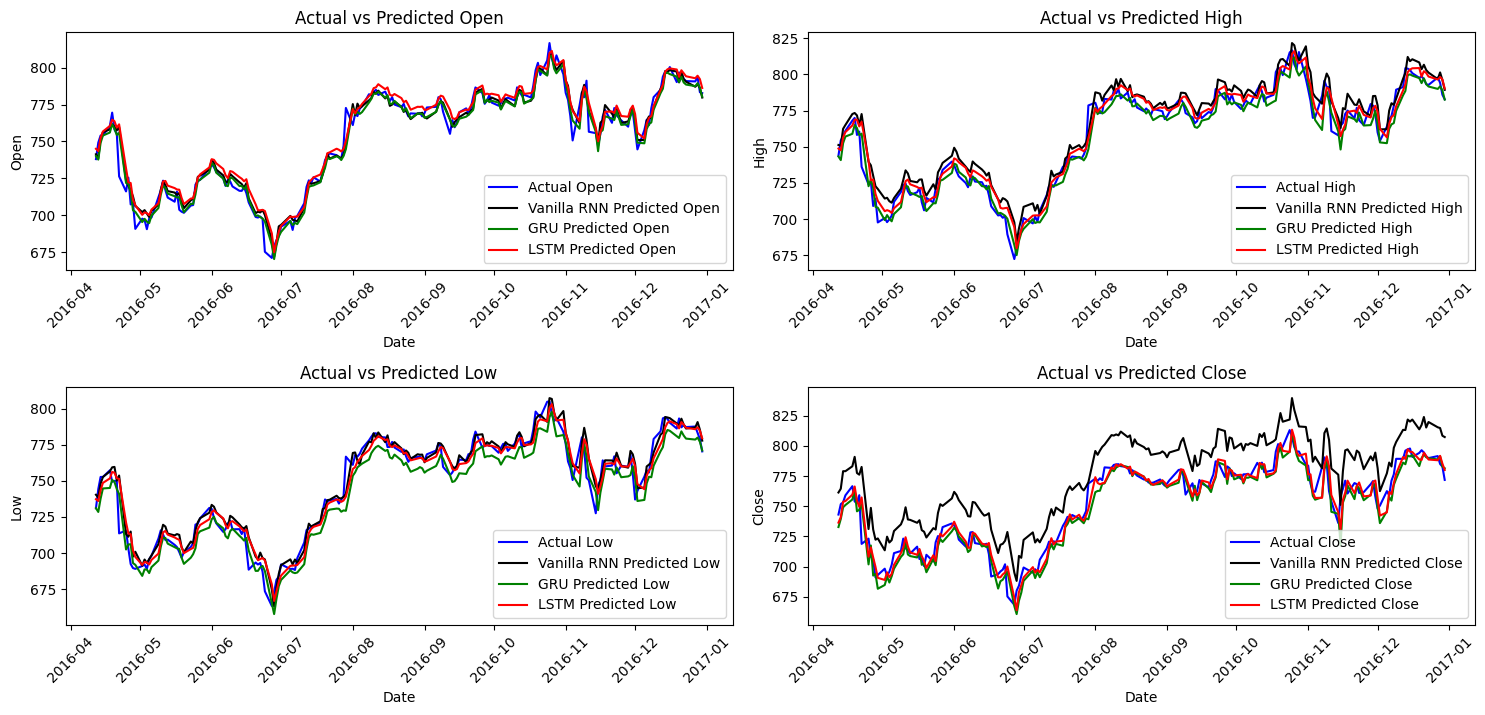

In [70]:
rnn_best_model_for_ohlc = rnn_grid_result_for_ohlc.best_estimator_  # Change to Vanilla RNN model
rnn_val_predictions_for_ohlc = rnn_best_model_for_ohlc.predict(X_val_opt)  # Use RNN model for predictions

gru_best_model_for_ohlc = gru_grid_result_for_ohlc.best_estimator_
gru_val_predictions_for_ohlc = gru_best_model_for_ohlc.predict(X_val_opt)

lstm_best_model_for_ohlc = lstm_grid_result_for_ohlc.best_estimator_
lstm_val_predictions_for_ohlc = lstm_best_model_for_ohlc.predict(X_val_opt)

# Inverse transform the predictions and actual values
val_data_inverse_opt = scaler_ohlc.inverse_transform(y_val_opt[:, :4])
rnn_val_predictions_inverse_for_ohlc = scaler_ohlc.inverse_transform(rnn_val_predictions_for_ohlc.reshape(-1, 4))
gru_val_predictions_inverse_for_ohlc = scaler_ohlc.inverse_transform(gru_val_predictions_for_ohlc.reshape(-1, 4))
lstm_val_predictions_inverse_for_ohlc = scaler_ohlc.inverse_transform(lstm_val_predictions_for_ohlc.reshape(-1, 4))

# Prepare date labels for the validation set
y_val_inverse_opt = scaler_ohlc.inverse_transform(y_val_opt[:, :4])
val_dates_opt = train_df['Date'].iloc[-len(val_data_inverse_opt):].values

# Plot the predicted vs actual values for open, high, low, close
plt.figure(figsize=(15, 10))

feature_names = ['Open', 'High', 'Low', 'Close']
for i in range(4):  # Loop through all 5 features
    plt.subplot(3, 2, i + 1)  # Create a subplot for each feature
    plt.plot(val_dates_opt, y_val_inverse_opt[:, i], label=f'Actual {feature_names[i]}', color='blue')
    plt.plot(val_dates_opt, rnn_val_predictions_inverse_for_ohlc[:, i], label=f'Vanilla RNN Predicted {feature_names[i]}', color='black')
    plt.plot(val_dates_opt, gru_val_predictions_inverse_for_ohlc[:, i], label=f'GRU Predicted {feature_names[i]}', color='green')
    plt.plot(val_dates_opt, lstm_val_predictions_inverse_for_ohlc[:, i], label=f'LSTM Predicted {feature_names[i]}', color='red')
    plt.xlabel('Date')
    plt.ylabel(feature_names[i])
    plt.legend()
    plt.title(f'Actual vs Predicted {feature_names[i]}')
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust subplot spacing
plt.show()



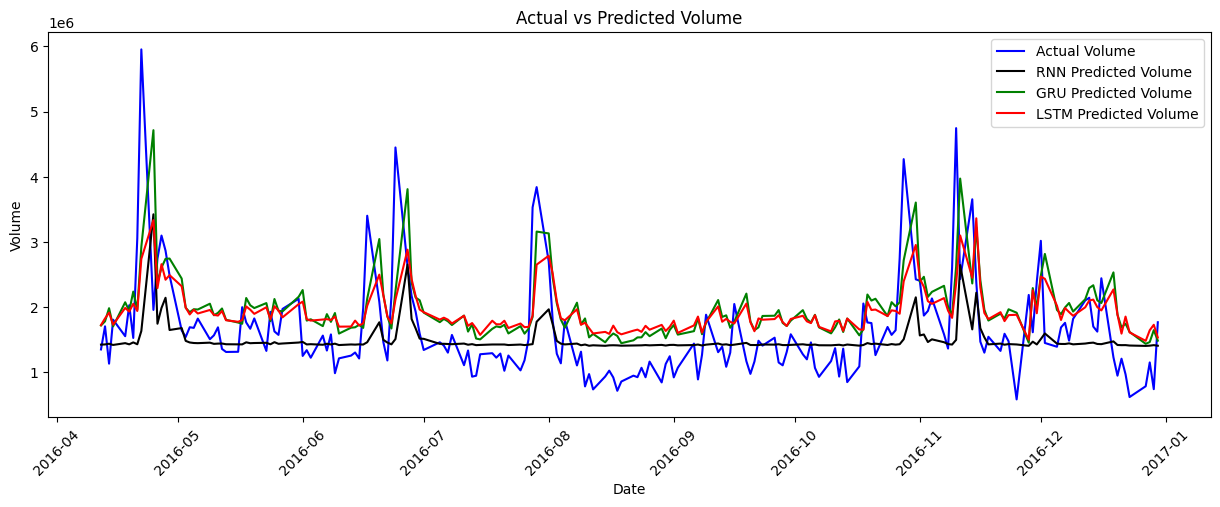

In [72]:

rnn_best_model_for_volume = rnn_grid_result_for_volume.best_estimator_
rnn_val_predictions_for_volume = rnn_best_model_for_volume.predict(X_val_opt)


gru_best_model_for_volume = gru_grid_result_for_volume.best_estimator_
gru_val_predictions_for_volume = gru_best_model_for_volume.predict(X_val_opt)

lstm_best_model_for_volume = lstm_grid_result_for_volume.best_estimator_
lstm_val_predictions_for_volume = lstm_best_model_for_volume.predict(X_val_opt)

# Inverse transform the predictions and actual values for 'Volume'
val_data_inverse_volume = scaler_volume.inverse_transform(y_val_opt[:, 4].reshape(-1, 1))
rnn_val_predictions_inverse_for_volume = scaler_volume.inverse_transform(rnn_val_predictions_for_volume.reshape(-1, 1))
gru_val_predictions_inverse_for_volume = scaler_volume.inverse_transform(gru_val_predictions_for_volume.reshape(-1, 1))
lstm_val_predictions_inverse_for_volume = scaler_volume.inverse_transform(lstm_val_predictions_for_volume.reshape(-1, 1))

# Prepare date labels for the validation set
val_dates_opt = train_df['Date'].iloc[-len(val_data_inverse_volume):].values

# Plot the predicted vs actual values for 'Volume'
plt.figure(figsize=(15, 5))
plt.plot(val_dates_opt, val_data_inverse_volume, label='Actual Volume', color='blue')
plt.plot(val_dates_opt, rnn_val_predictions_inverse_for_volume, label='RNN Predicted Volume', color='black')
plt.plot(val_dates_opt, gru_val_predictions_inverse_for_volume, label='GRU Predicted Volume', color='green')
plt.plot(val_dates_opt, lstm_val_predictions_inverse_for_volume, label='LSTM Predicted Volume', color='red')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.title('Actual vs Predicted Volume')
plt.xticks(rotation=45)
plt.show()

In [103]:
X_test_opt, y_test_opt = create_dataset(scaled_test_data, look_back)
# Make predictions
rnn_test_predictions_for_ohlc = rnn_best_model_for_ohlc.predict(X_test_opt)

# Evaluate performance
rnn_test_mse_ohlc = mean_squared_error(y_test_opt[:, :4], rnn_test_predictions_for_ohlc)  # For 'Open', 'High', 'Low', 'Close'
rnn_test_r2_ohlc = 1 - (np.sum((y_test_opt[:, :4] - rnn_test_predictions_for_ohlc) ** 2) / np.sum((y_test_opt[:, :4] - np.mean(y_test_opt[:, :4])) ** 2))

print(f'Vanilla RNN Best Model Validation R^2 for ohlc: {rnn_test_mse_ohlc}')
print(f'Vanilla RNN Best Model Validation MSE for ohlc: {rnn_test_r2_ohlc}')

# Evaluate the best Vanilla RNN model on the test set for volume
rnn_test_predictions_for_volume = rnn_best_model_for_volume.predict(X_test_opt)
rnn_test_mse_volume = mean_squared_error(y_test_opt[:, 4], rnn_test_predictions_for_volume)
rnn_test_r2_volume = 1 - (np.sum((y_test_opt[:, 4] - rnn_test_predictions_for_volume) ** 2) / np.sum((y_test_opt[:, 4] - np.mean(y_test_opt[:, 4])) ** 2))

print(f'Vanilla RNN Best Model Validation R^2 for Volume: {rnn_test_r2_volume}')
print(f'Vanilla RNN Best Model Validation MSE for Volume: {rnn_test_mse_volume}')


Vanilla RNN Best Model Validation R^2 for ohlc: 0.0005058537263574736
Vanilla RNN Best Model Validation MSE for ohlc: 0.9930673107192716
Vanilla RNN Best Model Validation R^2 for Volume: -0.06614663809555754
Vanilla RNN Best Model Validation MSE for Volume: 0.08852331461070236


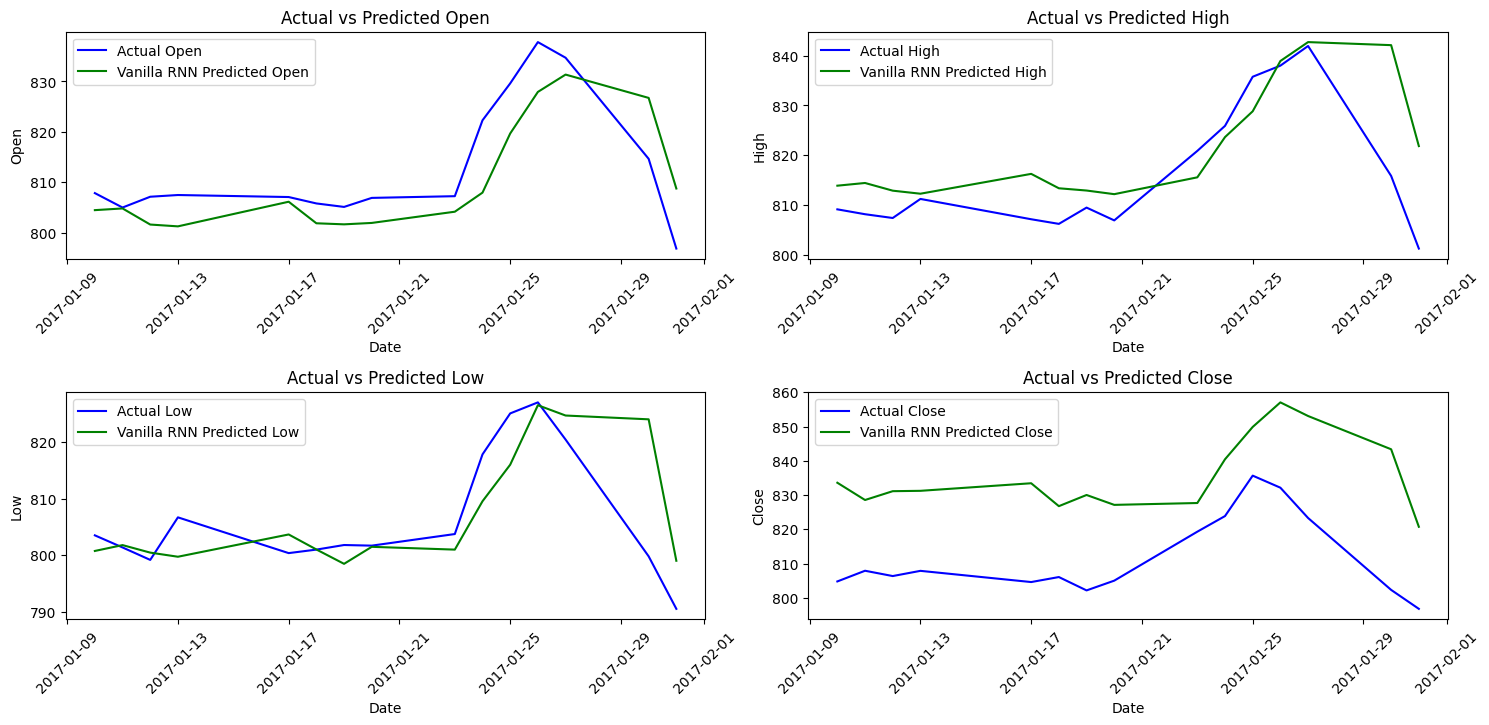

In [114]:
# Evaluate the best Vanilla RNN model on the test set for open, high, low, close
if X_test_opt.size > 0:
    rnn_test_predictions_for_ohlc = rnn_best_model_for_ohlc.predict(X_test_opt)  # Use X_test_opt instead of X_test

    test_dates = test_df['Date'][look_back:].values
    y_test_inverse = scaler_ohlc.inverse_transform(y_test_opt[:, :4])  # Use y_test_opt for inverse transformation
    rnn_test_predictions_inverse_for_ohlc = scaler_ohlc.inverse_transform(rnn_test_predictions_for_ohlc)

    # Plot the predicted vs actual values for open, high, low, close
    plt.figure(figsize=(15, 10))

    feature_names = ['Open', 'High', 'Low', 'Close']
    for i in range(4):  # Loop through the four features: Open, High, Low, Close
        plt.subplot(3, 2, i + 1)  # Create a subplot for each feature
        plt.plot(test_dates, y_test_inverse[:, i], label=f'Actual {feature_names[i]}', color='blue')
        plt.plot(test_dates, rnn_test_predictions_inverse_for_ohlc[:, i], label=f'Vanilla RNN Predicted {feature_names[i]}', color='green')
        plt.xlabel('Date')
        plt.ylabel(feature_names[i])
        plt.legend()
        plt.title(f'Actual vs Predicted {feature_names[i]}')
        plt.xticks(rotation=45)

    plt.tight_layout()  # Adjust subplot spacing
    plt.show()
else:
    print("No test data available for evaluation.")



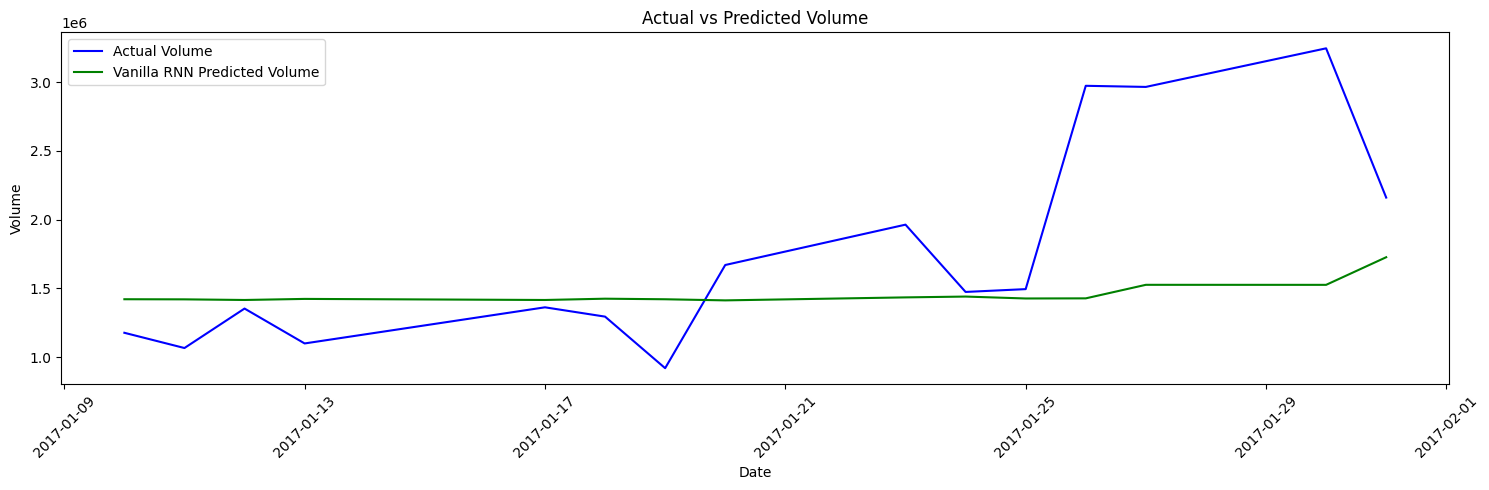

In [117]:
# Evaluate the best Vanilla RNN model on the test set for volume
if X_test_opt.size > 0:
    rnn_test_predictions_for_volume = rnn_best_model_for_volume.predict(X_test_opt)  # Use X_test_opt instead of X_test

    test_dates = test_df['Date'][look_back:].values
    y_test_inverse = scaler_volume.inverse_transform(y_test_opt[:, 4].reshape(-1, 1))  # Use y_test_opt and scaler_volume
    rnn_test_predictions_inverse_for_volume = scaler_volume.inverse_transform(rnn_test_predictions_for_volume.reshape(-1, 1))

    # Plot the predicted vs actual values for volume
    plt.figure(figsize=(15, 5))
    plt.plot(test_dates, y_test_inverse, label='Actual Volume', color='blue')
    plt.plot(test_dates, rnn_test_predictions_inverse_for_volume, label='Vanilla RNN Predicted Volume', color='green')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.title('Actual vs Predicted Volume')
    plt.xticks(rotation=45)

    plt.tight_layout()  # Adjust subplot spacing
    plt.show()
else:
    print("No test data available for evaluation.")



In [118]:
# Make predictions for GRU model (for ohlc)
gru_test_predictions_for_ohlc = gru_best_model_for_ohlc.predict(X_test_opt)

# Evaluate performance for GRU model (for ohlc)
gru_test_mse_ohlc = mean_squared_error(y_test_opt[:, :4], gru_test_predictions_for_ohlc)  # For 'Open', 'High', 'Low', 'Close'
gru_test_r2_ohlc = 1 - (np.sum((y_test_opt[:, :4] - gru_test_predictions_for_ohlc) ** 2) / np.sum((y_test_opt[:, :4] - np.mean(y_test_opt[:, :4])) ** 2))

print(f'GRU Best Model Validation R^2 for ohlc: {gru_test_r2_ohlc}')
print(f'GRU Best Model Validation MSE for ohlc: {gru_test_mse_ohlc}')

# Evaluate the best GRU model on the test set for volume
gru_test_predictions_for_volume = gru_best_model_for_volume.predict(X_test_opt)
gru_test_mse_volume = mean_squared_error(y_test_opt[:, 4], gru_test_predictions_for_volume)
gru_test_r2_volume = 1 - (np.sum((y_test_opt[:, 4] - gru_test_predictions_for_volume) ** 2) / np.sum((y_test_opt[:, 4] - np.mean(y_test_opt[:, 4])) ** 2))

print(f'GRU Best Model Validation R^2 for Volume: {gru_test_r2_volume}')
print(f'GRU Best Model Validation MSE for Volume: {gru_test_mse_volume}')




GRU Best Model Validation R^2 for ohlc: 0.9957520959427866
GRU Best Model Validation MSE for ohlc: 0.00030995447935677154
GRU Best Model Validation R^2 for Volume: 0.3065089784851218
GRU Best Model Validation MSE for Volume: 0.05758131356763383


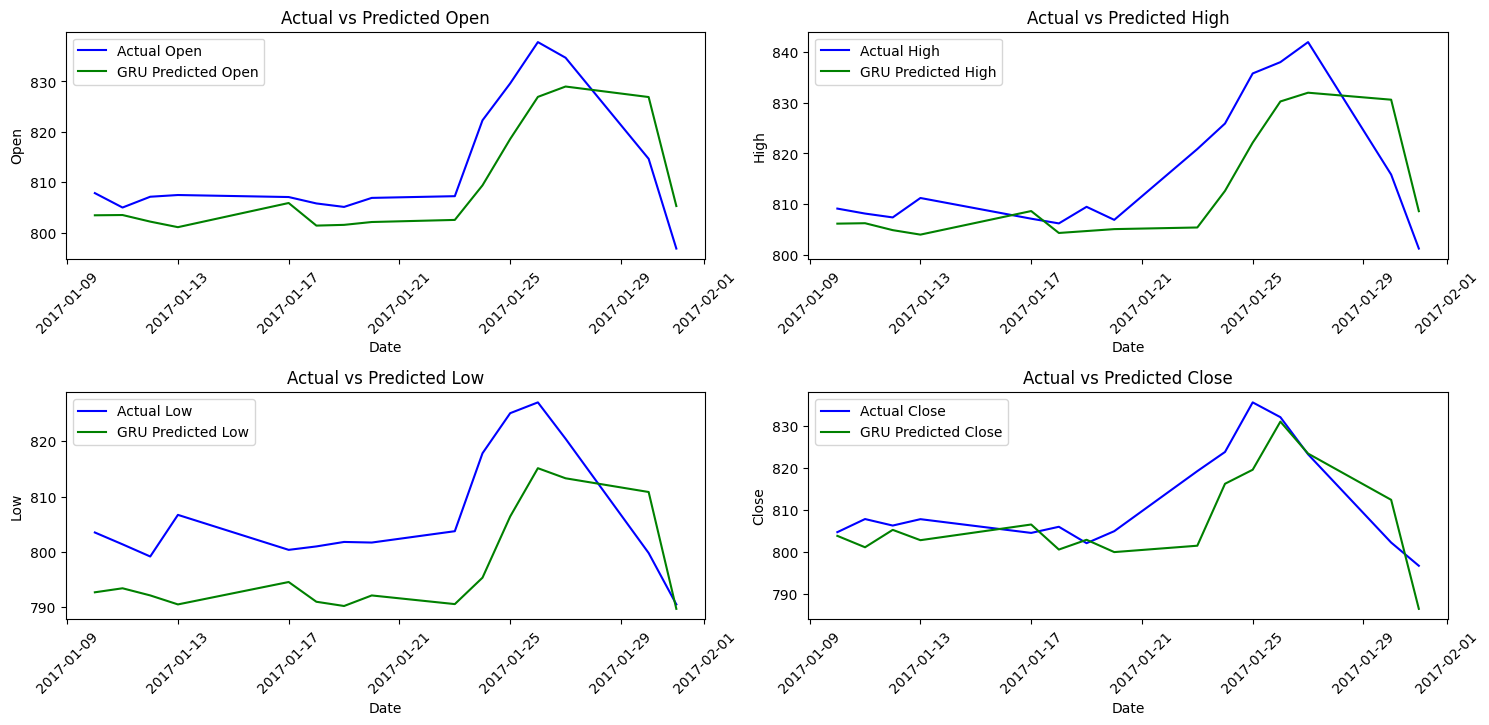

In [119]:
# Evaluate the best GRU model on the test set for open, high, low, close
if X_test_opt.size > 0:
    gru_test_predictions_for_ohlc = gru_best_model_for_ohlc.predict(X_test_opt)  # Use GRU model

    test_dates = test_df['Date'][look_back:].values
    y_test_inverse = scaler_ohlc.inverse_transform(y_test_opt[:, :4])  # Use y_test_opt for inverse transformation
    gru_test_predictions_inverse_for_ohlc = scaler_ohlc.inverse_transform(gru_test_predictions_for_ohlc)

    # Plot the predicted vs actual values for open, high, low, close
    plt.figure(figsize=(15, 10))

    feature_names = ['Open', 'High', 'Low', 'Close']
    for i in range(4):  # Loop through the four features: Open, High, Low, Close
        plt.subplot(3, 2, i + 1)  # Create a subplot for each feature
        plt.plot(test_dates, y_test_inverse[:, i], label=f'Actual {feature_names[i]}', color='blue')
        plt.plot(test_dates, gru_test_predictions_inverse_for_ohlc[:, i], label=f'GRU Predicted {feature_names[i]}', color='green')
        plt.xlabel('Date')
        plt.ylabel(feature_names[i])
        plt.legend()
        plt.title(f'Actual vs Predicted {feature_names[i]}')
        plt.xticks(rotation=45)

    plt.tight_layout()  # Adjust subplot spacing
    plt.show()
else:
    print("No test data available for evaluation.")


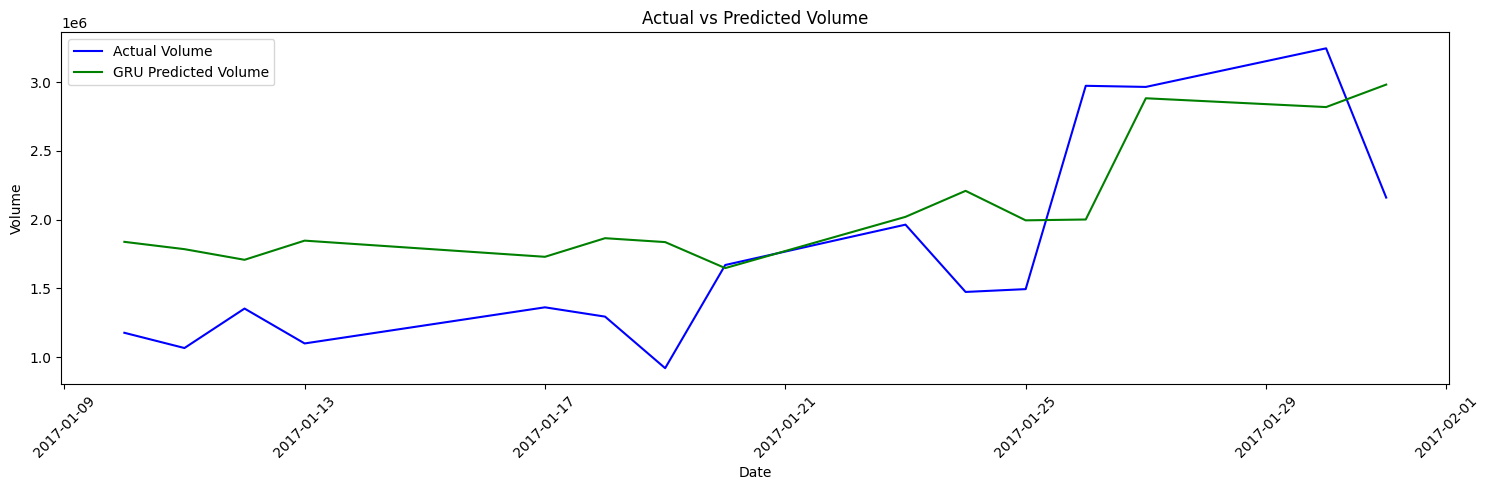

In [120]:
# Evaluate the best GRU model on the test set for volume
if X_test_opt.size > 0:
    gru_test_predictions_for_volume = gru_best_model_for_volume.predict(X_test_opt)  # Use GRU model instead of RNN

    test_dates = test_df['Date'][look_back:].values
    y_test_inverse = scaler_volume.inverse_transform(y_test_opt[:, 4].reshape(-1, 1))  # Use y_test_opt and scaler_volume
    gru_test_predictions_inverse_for_volume = scaler_volume.inverse_transform(gru_test_predictions_for_volume.reshape(-1, 1))

    # Plot the predicted vs actual values for volume
    plt.figure(figsize=(15, 5))
    plt.plot(test_dates, y_test_inverse, label='Actual Volume', color='blue')
    plt.plot(test_dates, gru_test_predictions_inverse_for_volume, label='GRU Predicted Volume', color='green')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.title('Actual vs Predicted Volume')
    plt.xticks(rotation=45)

    plt.tight_layout()  # Adjust subplot spacing
    plt.show()
else:
    print("No test data available for evaluation.")



In [121]:
# Make predictions for LSTM model (for ohlc)
lstm_test_predictions_for_ohlc = lstm_best_model_for_ohlc.predict(X_test_opt)

# Evaluate performance for LSTM model (for ohlc)
lstm_test_mse_ohlc = mean_squared_error(y_test_opt[:, :4], lstm_test_predictions_for_ohlc)  # For 'Open', 'High', 'Low', 'Close'
lstm_test_r2_ohlc = 1 - (np.sum((y_test_opt[:, :4] - lstm_test_predictions_for_ohlc) ** 2) / np.sum((y_test_opt[:, :4] - np.mean(y_test_opt[:, :4])) ** 2))

print(f'LSTM Best Model Validation R^2 for ohlc: {lstm_test_r2_ohlc}')
print(f'LSTM Best Model Validation MSE for ohlc: {lstm_test_mse_ohlc}')

# Evaluate the best LSTM model on the test set for volume
lstm_test_predictions_for_volume = lstm_best_model_for_volume.predict(X_test_opt)
lstm_test_mse_volume = mean_squared_error(y_test_opt[:, 4], lstm_test_predictions_for_volume)
lstm_test_r2_volume = 1 - (np.sum((y_test_opt[:, 4] - lstm_test_predictions_for_volume) ** 2) / np.sum((y_test_opt[:, 4] - np.mean(y_test_opt[:, 4])) ** 2))

print(f'LSTM Best Model Validation R^2 for Volume: {lstm_test_r2_volume}')
print(f'LSTM Best Model Validation MSE for Volume: {lstm_test_mse_volume}')



LSTM Best Model Validation R^2 for ohlc: 0.9971323771493263
LSTM Best Model Validation MSE for ohlc: 0.00020924025959644674
LSTM Best Model Validation R^2 for Volume: 0.33051195830729896
LSTM Best Model Validation MSE for Volume: 0.055588320053919366


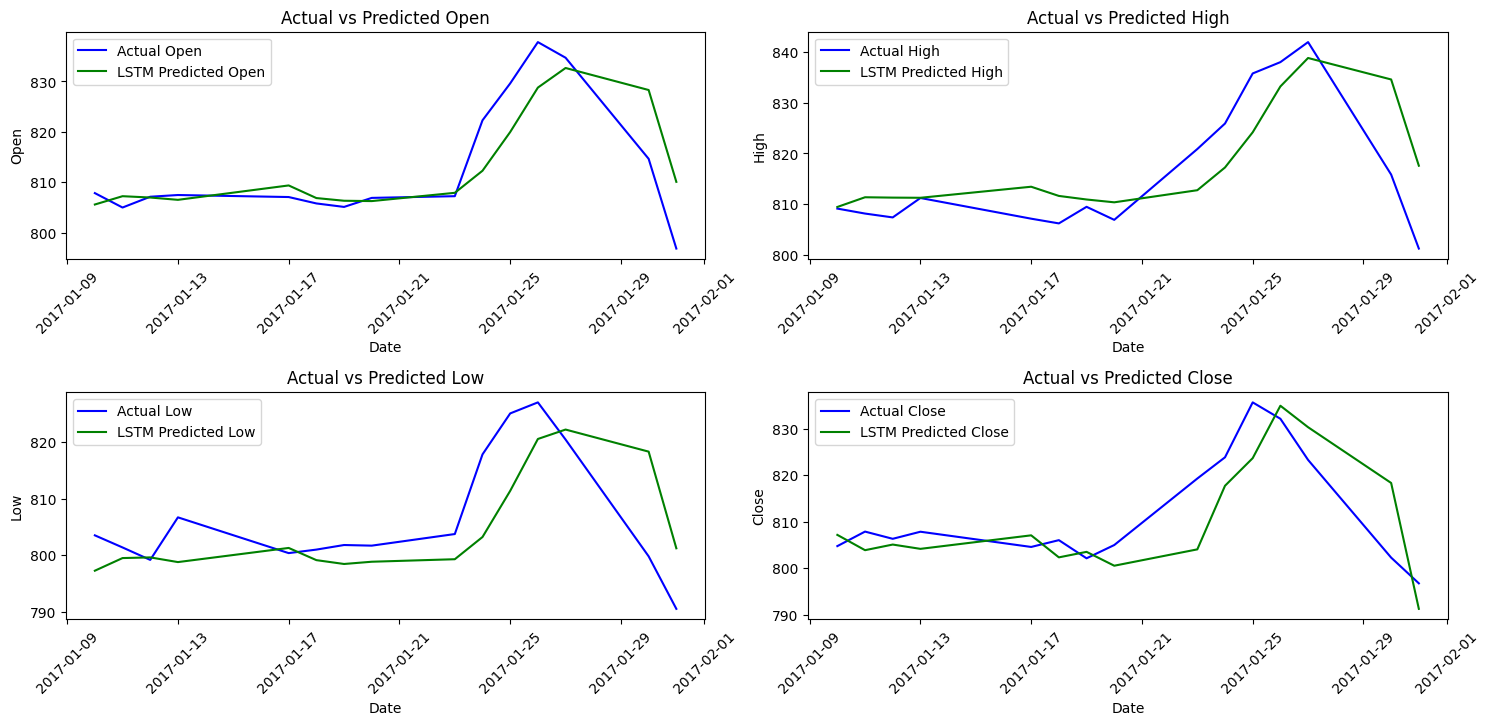

In [122]:
# Evaluate the best LSTM model on the test set for open, high, low, close
if X_test_opt.size > 0:
    lstm_test_predictions_for_ohlc = lstm_best_model_for_ohlc.predict(X_test_opt)  # Use LSTM model instead of GRU

    test_dates = test_df['Date'][look_back:].values
    y_test_inverse = scaler_ohlc.inverse_transform(y_test_opt[:, :4])  # Use y_test_opt for inverse transformation
    lstm_test_predictions_inverse_for_ohlc = scaler_ohlc.inverse_transform(lstm_test_predictions_for_ohlc)

    # Plot the predicted vs actual values for open, high, low, close
    plt.figure(figsize=(15, 10))

    feature_names = ['Open', 'High', 'Low', 'Close']
    for i in range(4):  # Loop through the four features: Open, High, Low, Close
        plt.subplot(3, 2, i + 1)  # Create a subplot for each feature
        plt.plot(test_dates, y_test_inverse[:, i], label=f'Actual {feature_names[i]}', color='blue')
        plt.plot(test_dates, lstm_test_predictions_inverse_for_ohlc[:, i], label=f'LSTM Predicted {feature_names[i]}', color='green')
        plt.xlabel('Date')
        plt.ylabel(feature_names[i])
        plt.legend()
        plt.title(f'Actual vs Predicted {feature_names[i]}')
        plt.xticks(rotation=45)

    plt.tight_layout()  # Adjust subplot spacing
    plt.show()
else:
    print("No test data available for evaluation.")



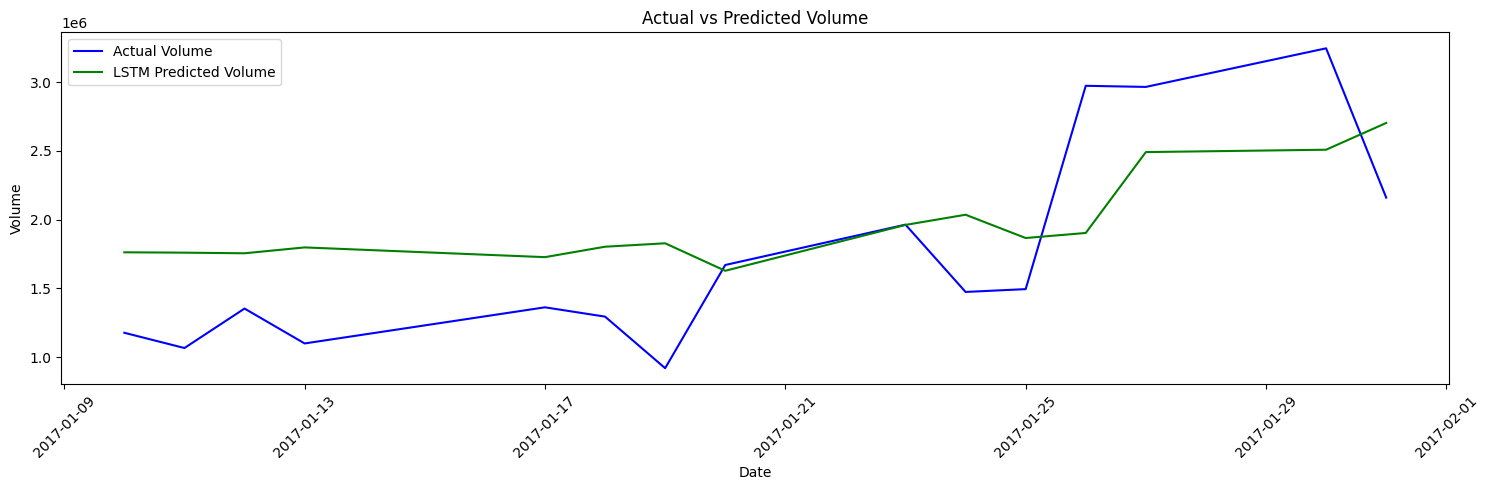

In [123]:
# Evaluate the best LSTM model on the test set for volume
if X_test_opt.size > 0:
    lstm_test_predictions_for_volume = lstm_best_model_for_volume.predict(X_test_opt)  # Use LSTM model instead of GRU

    test_dates = test_df['Date'][look_back:].values
    y_test_inverse = scaler_volume.inverse_transform(y_test_opt[:, 4].reshape(-1, 1))  # Use y_test_opt and scaler_volume
    lstm_test_predictions_inverse_for_volume = scaler_volume.inverse_transform(lstm_test_predictions_for_volume.reshape(-1, 1))

    # Plot the predicted vs actual values for volume
    plt.figure(figsize=(15, 5))
    plt.plot(test_dates, y_test_inverse, label='Actual Volume', color='blue')
    plt.plot(test_dates, lstm_test_predictions_inverse_for_volume, label='LSTM Predicted Volume', color='green')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.title('Actual vs Predicted Volume')
    plt.xticks(rotation=45)

    plt.tight_layout()  # Adjust subplot spacing
    plt.show()
else:
    print("No test data available for evaluation.")

